In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
connectable = "sqlite:///jupiter.db"
query = "SELECT * FROM moons"
df = pd.read_sql(query, connectable)
df

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
0,Adrastea,0.298000,129000.0,8.20,NaN,NaN,Inner,0.001500,0.03
1,Aitne,730.000000,23231000.0,1.50,22.70,NaN,Carme,0.264000,165.00
2,Amalthea,0.498000,181400.0,83.50,14.10,2.080000e+18,Inner,0.003190,0.37
3,Ananke,630.000000,21300000.0,14.00,18.90,NaN,Ananke,0.174725,148.60
4,Aoede,761.000000,24000000.0,2.00,22.50,NaN,Pasiphae,0.432000,158.00
5,Arche,724.000000,22931000.0,1.50,22.80,NaN,Carme,0.259000,165.00
6,Autonoe,719.000000,23039000.0,2.00,22.00,NaN,Pasiphae,0.334000,153.00
7,Callirrhoe,787.000000,24583090.0,4.80,20.80,NaN,Pasiphae,0.309570,148.00
8,Callisto,16.689018,1882700.0,2410.30,5.65,1.075938e+23,Galilean,0.007400,2.02
9,Carme,693.000000,22579850.0,23.35,18.90,NaN,Carme,0.229493,163.00


class Moons:
    def __init__(self):
        connectable = "sqlite:///jupiter.db"
        query = "SELECT * FROM moons"
        self.data = pd.read_sql(query, connectable)
    
    def summary_statistics(self):
        return self.data.describe()
    
    def correlation_analysis(self):
        return self.data.corr()
    
    def plot_moon_distances(self):
        self.data.plot(kind='bar', x='moon', y='distance_km')
        plt.xlabel('Distance (km)')
        plt.ylabel('Moon')
        plt.title('Distances of Moons')
        plt.show()
        
    def get_moon_data(self, moon_name):
        return self.data[self.data['moon'] == moon_name]
    
    def prepare_data_for_regression(self):
    # Assuming 'period_days' and 'distance_km' are columns in the dataset
        self.data['T_squared'] = np.square(self.data['period_days'] * 24 * 3600)  # Convert to seconds
        self.data['a_cubed'] = np.power(self.data['distance_km'] * 1000, 3)  # Convert to meters
        
    def setup_and_train_model(self):
        X = self.data[['a_cubed']]
        y = self.data['T_squared']
        self.model = LinearRegression()
        self.model.fit(X, y)
        
    def predict_jupiter_mass(self, G=6.67e-11):
    # The slope of the regression line corresponds to 4π²/GM
        GM = 4 * np.pi**2 / self.model.coef_[0]
        return GM / G
    

       period_days   distance_km    radius_km        mag       mass_kg  \
count    56.000000  5.600000e+01    56.000000  53.000000  6.000000e+00   
mean    525.998146  1.775655e+07   158.969643  20.418302  6.551798e+22   
std     272.670243  8.253688e+06   557.730632   4.926587  6.010469e+22   
min       0.290000  1.280000e+05     1.000000   4.610000  2.080000e+18   
25%     258.750000  1.170252e+07     1.500000  20.800000  1.200276e+22   
50%     632.500000  2.129009e+07     2.000000  22.500000  6.865891e+22   
75%     725.500000  2.336375e+07    11.562500  23.000000  1.030252e+23   
max     787.000000  2.458309e+07  2634.100000  23.700000  1.481900e+23   

             ecc  inclination_deg  
count  56.000000        56.000000  
mean    0.222922       113.571607  
std     0.126899        64.562822  
min     0.000200         0.030000  
25%     0.159201        30.582500  
50%     0.228000       148.600000  
75%     0.298858       159.175000  
max     0.611016       166.200000  


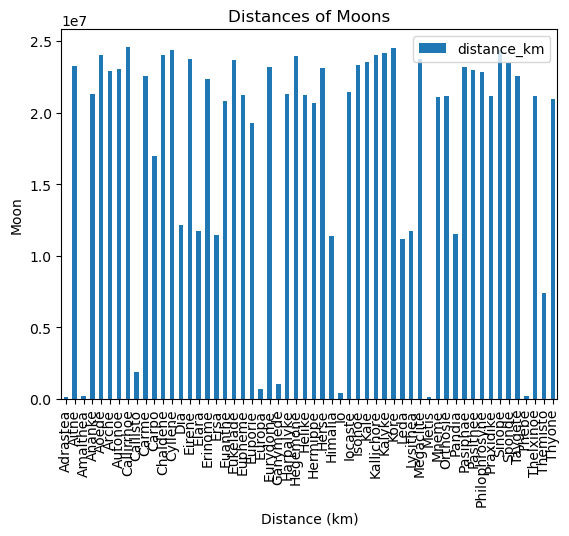

In [3]:
from jupiter import *

# Initialize the class with the path to the database
moons = Moons()

# Call previous methods
#print the statistics
print(moons.summary_statistics())
#print the plot
moons.plot_moon_distances()



In [4]:
#check some interested moon information
moons.get_moon_data('Metis') #small distance


,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
41,Metis,0.29,128000.0,21.5,NaN,NaN,Inner,0.0002,2.0


In [5]:
moons.get_moon_data('Megaclite')#long distance

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
40,Megaclite,747.0,23736190.0,3.0,21.7,NaN,Pasiphae,0.410217,143.0


In [6]:
# Prepare data and train the model
moons.prepare_data_for_regression()
moons.setup_and_train_model()

# Estimate Jupiter's mass
jupiter_mass = moons.predict_jupiter_mass()
print(f"Estimated mass of Jupiter: {jupiter_mass} kg")

Estimated mass of Jupiter: 1.9330851507257145e+27 kg
